# Shapash with custom colors

<b>With this tutorial you will understand how to manipulate colors with Shapash plots</b>

Contents:
- Build a Regressor
- Compile Shapash SmartExplainer
- Use `palette_name` parameter
- Use `colors_dict` parameter
- Change the colors after comiling the explainer

Data from Kaggle [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
from category_encoders import OrdinalEncoder
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

## Building Supervized Model

In [2]:
from shapash.data.data_loader import data_loading
house_df, house_dict = data_loading('house_prices')

In [3]:
y_df=house_df['SalePrice'].to_frame()
X_df=house_df[house_df.columns.difference(['SalePrice'])]

In [4]:
house_df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,2-Story 1946 & Newer,Residential Low Density,8450,Paved,Regular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Inside lot,Gentle slope,College Creek,...,0,0,0,0,0,2,2008,Warranty Deed - Conventional,Normal Sale,208500
2,1-Story 1946 & Newer All Styles,Residential Low Density,9600,Paved,Regular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Frontage on 2 sides of property,Gentle slope,Veenker,...,0,0,0,0,0,5,2007,Warranty Deed - Conventional,Normal Sale,181500
3,2-Story 1946 & Newer,Residential Low Density,11250,Paved,Slightly irregular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Inside lot,Gentle slope,College Creek,...,0,0,0,0,0,9,2008,Warranty Deed - Conventional,Normal Sale,223500
4,2-Story 1945 & Older,Residential Low Density,9550,Paved,Slightly irregular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Corner lot,Gentle slope,Crawford,...,272,0,0,0,0,2,2006,Warranty Deed - Conventional,Abnormal Sale,140000
5,2-Story 1946 & Newer,Residential Low Density,14260,Paved,Slightly irregular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Frontage on 2 sides of property,Gentle slope,Northridge,...,0,0,0,0,0,12,2008,Warranty Deed - Conventional,Normal Sale,250000


In [5]:
from category_encoders import OrdinalEncoder

categorical_features = [col for col in X_df.columns if X_df[col].dtype == 'object']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True).fit(X_df)

X_df=encoder.transform(X_df)

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, train_size=0.75, random_state=1)

In [7]:
regressor = LGBMRegressor(n_estimators=200).fit(Xtrain,ytrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2986
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 66
[LightGBM] [Info] Start training from score 182319.757078


In [8]:
y_pred = pd.DataFrame(regressor.predict(Xtest),columns=['pred'],index=Xtest.index)

## Shapash with different colors

### Option 1 : use `palette_name`  parameter

In [9]:
from shapash import SmartExplainer

In [10]:
xpl = SmartExplainer(
    model=regressor,
    preprocessing=encoder, # Optional: compile step can use inverse_transform method
    features_dict=house_dict,
    palette_name='blues'  # Other available name : 'default' 
)

In [11]:
xpl.compile(
    x=Xtest,
    y_pred=y_pred, # Optional
    y_target=ytest, # Optional: allows to display True Values vs Predicted Values
)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7f1d1b7d3910>


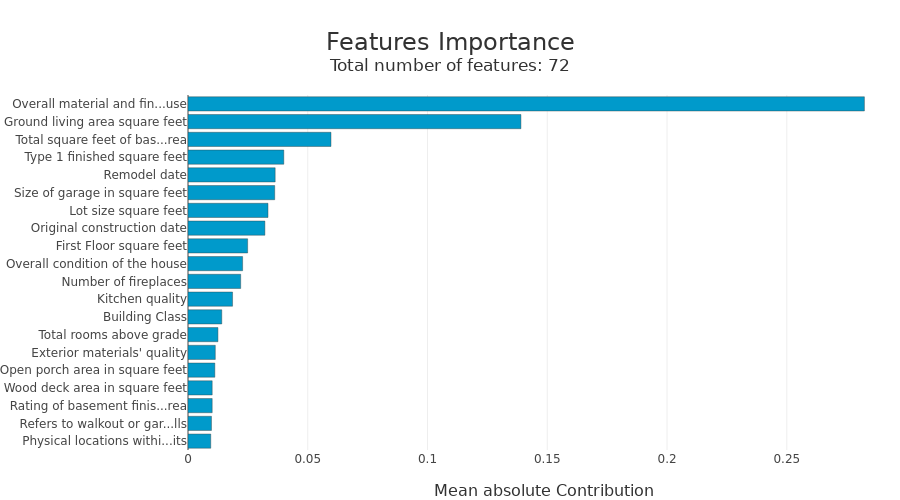

In [12]:
xpl.plot.features_importance()

### Option 2 : define user-specific colors with `colors_dict` parameter

The colors declared will replace the one in the palette used.

In the example below, we replace the colors used in the features importance bar plot:

In [13]:
# first, let's print the colors used in the previous explainer: 
xpl.colors_dict['featureimp_bar']

{'1': 'rgba(0, 154, 203, 1)', '2': 'rgba(223, 103, 0, 0.8)'}

In [14]:
# Now we replace these colors using the colors_dict parameter
xpl2 = SmartExplainer(
    model=regressor,
    preprocessing=encoder, 
    features_dict=house_dict,
    colors_dict=dict(
        featureimp_bar={
            '1': 'rgba(100, 120, 150, 1)', 
            '2': 'rgba(120, 103, 50, 0.8)'
        },
        featureimp_line='rgba(150, 150, 54, 0.8)'
    )
)

In [15]:
xpl2.compile(x=Xtest, y_pred=y_pred)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7f1d1b6f0ee0>


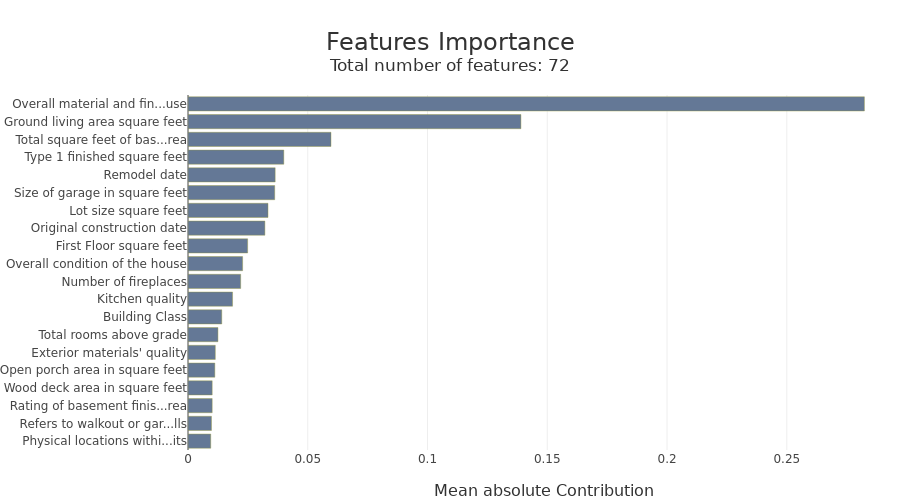

In [16]:
xpl2.plot.features_importance()

### Option 3 : redefine colors after compiling shapash

In [17]:
xpl3 = SmartExplainer(
    model=regressor,
    preprocessing=encoder, 
    features_dict=house_dict,
)

In [18]:
xpl3.compile(x=Xtest, y_pred=y_pred)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7f1d1b1fbf10>


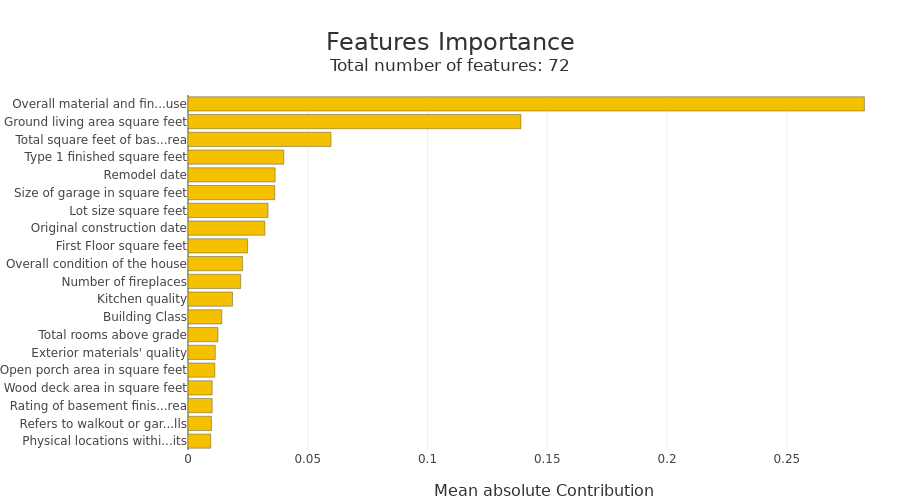

In [19]:
xpl3.plot.features_importance()

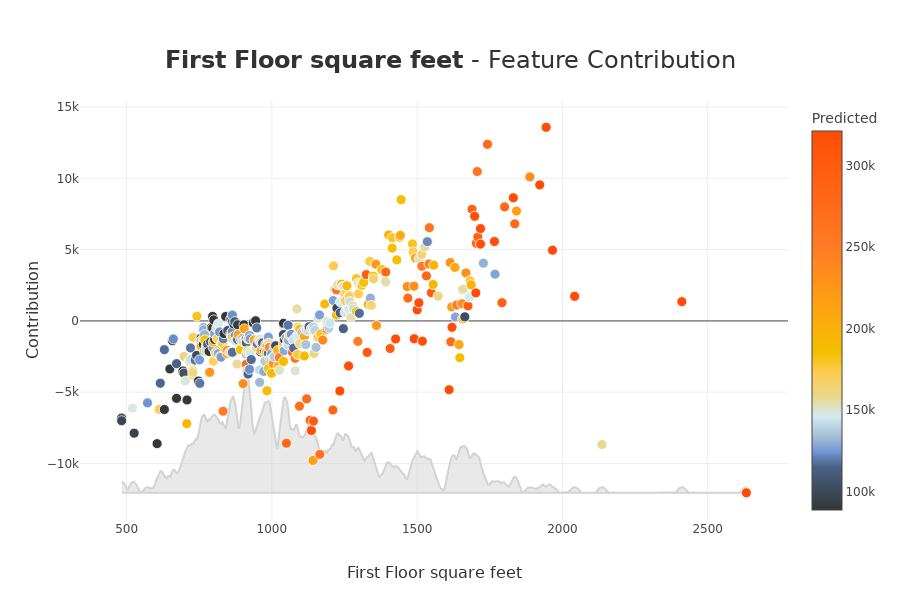

In [20]:
xpl3.plot.contribution_plot('1stFlrSF')

- **We redefine the colors with the `blues` palette and custom colors for the features importance plot**

In [21]:
xpl3.define_style(
    palette_name='blues', 
    colors_dict=dict(
        featureimp_bar={
            '1': 'rgba(100, 120, 150, 1)', 
            '2': 'rgba(120, 103, 50, 0.8)'
        }
))

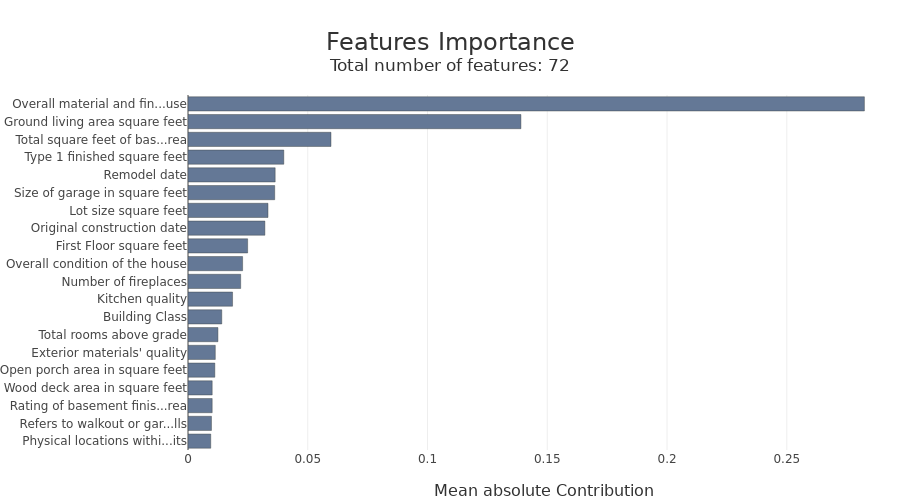

In [22]:
xpl3.plot.features_importance()

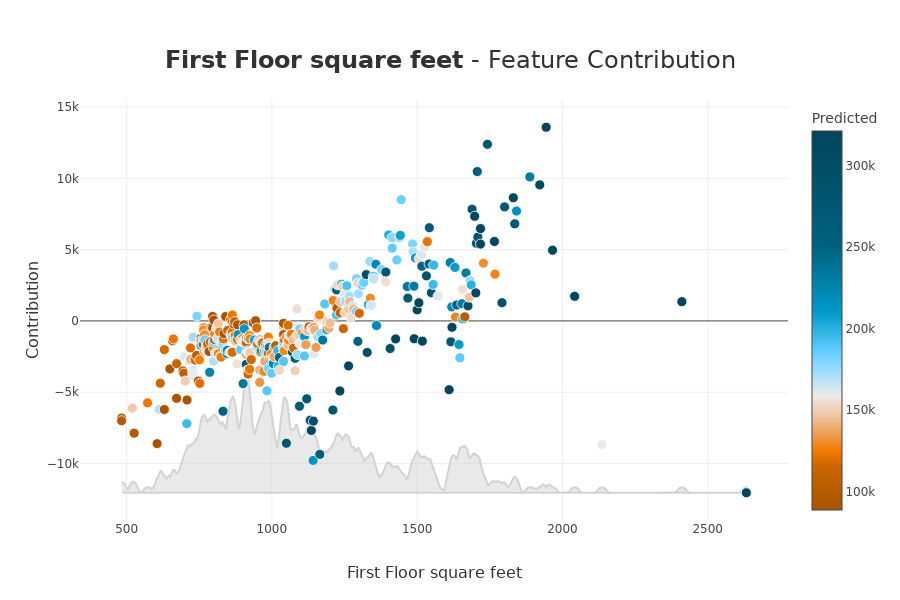

In [23]:
xpl3.plot.contribution_plot('1stFlrSF')